In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Capítulo 2

In [2]:
# Import TCGA melanoma data
data_table = pd.read_csv('counts.txt', index_col=0)
data_table.iloc[:5, :]

,00624286-41dd-476f-a63b-d2a5f484bb45,TCGA-FS-A1Z0,TCGA-D9-A3Z1,02c76d24-f1d2-4029-95b4-8be3bda8fdbe,TCGA-EB-A51B,TCGA-D3-A1Q3,TCGA-FR-A44A,TCGA-EE-A17Z,TCGA-D3-A51G,TCGA-D3-A51E,...,TCGA-D9-A149,TCGA-EE-A3AG,TCGA-D9-A4Z2,TCGA-EB-A4OZ,TCGA-EE-A3J4,TCGA-FS-A1ZM,TCGA-D3-A5GS,TCGA-EB-A3XF,TCGA-EE-A2GE,ff7431a9-243a-4651-80bb-096379925bbe
A1BG,1272.36,452.96,288.06,400.11,420.46,877.59,402.77,559.20,269.59,586.66,...,631.78,560.60,846.55,678.00,32.88,997.41,256.93,461.60,634.06,530.36
A1CF,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,4.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
A2BP1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00
A2LD1,164.38,552.43,201.83,165.12,95.75,636.63,241.56,30.82,105.44,239.19,...,218.47,274.45,770.04,71.74,17.00,194.26,156.81,84.35,242.01,377.03
A2ML1,27.00,0.00,0.00,0.00,8.00,0.00,1.00,763.00,0.00,0.00,...,3.00,6.00,0.00,1043.00,1.00,852.00,4.00,587.00,0.00,2.00


In [3]:
samples = list(data_table.columns)

In [4]:
# Import gene lengths
gene_info = pd.read_csv('genes.csv', index_col=0)
print(gene_info.iloc[:5, :])

            GeneID  GeneLength
GeneSymbol                    
CPA1          1357        1724
GUCY2D        3000        3623
UBC           7316        2687
C11orf95     65998        5581
ANKMY2       57037        2611


In [5]:
print("Genes in data_table: ", data_table.shape[0])
print("Genes in gene_info: ", gene_info.shape[0])

Genes in data_table:  20500
Genes in gene_info:  20503


In [6]:
# Subset gene info to match the count data
matched_index = pd.Index.intersection(data_table.index, gene_info.index)

In [7]:
# 2D ndarray containing expression counts for each gene in each individual
counts = np.asarray(data_table.loc[matched_index], dtype=int)
gene_names = np.array(matched_index)

# Check how many genes and individuals were measured
print(f'{counts.shape[0]} genes measured in {counts.shape[1]} individuals.')

20500 genes measured in 375 individuals.


In [8]:
# 1D ndarray containing the lengths of each gene
gene_lengths = np.asarray(gene_info.loc[matched_index]['GeneLength'],
dtype=int)
gene_lengths

array([3931, 2409, 5897, ..., 4495, 3947, 1434])

In [9]:
print(counts.shape)
print(gene_lengths.shape)

(20500, 375)
(20500,)


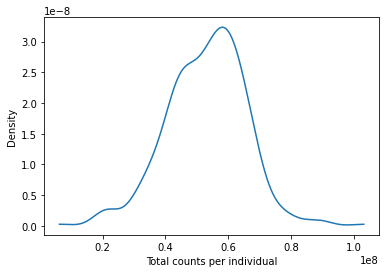

Count statistics:
 min: 6231205
 mean: 52995255.33866667
 max: 103219262


In [10]:
total_counts = np.sum(counts, axis=0) # sum columns together
# (axis=1 would sum rows)
from scipy import stats
# Use Gaussian smoothing to estimate the density
density = stats.kde.gaussian_kde(total_counts)
# Make values for which to estimate the density, for plotting
x = np.arange(min(total_counts), max(total_counts), 10000)

# Make the density plot
fig, ax = plt.subplots()
ax.plot(x, density(x))
ax.set_xlabel("Total counts per individual")
ax.set_ylabel("Density")
plt.show()
print(f'Count statistics:\n min: {np.min(total_counts)}'
f'\n mean: {np.mean(total_counts)}'
f'\n max: {np.max(total_counts)}')

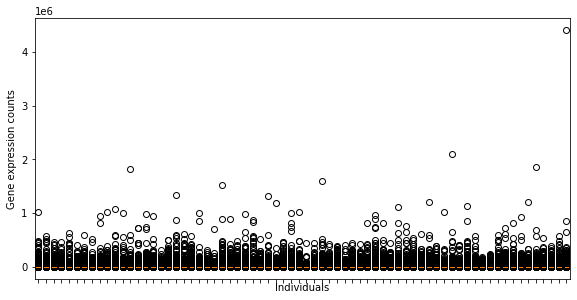

In [11]:
# Subset data for plotting
np.random.seed(seed=7) # Set seed so we will get consistent results
# Randomly select 70 samples
samples_index = np.random.choice(range(counts.shape[1]), size=70, replace=False)
counts_subset = counts[:, samples_index]

# Some custom x-axis labelling to make our plots easier to read
def reduce_xaxis_labels(ax, factor):
    """Show only every ith label to prevent crowding on x-axis
    e.g. factor = 2 would plot every second x-axis label,
    starting at the first.
    Parameters
    ----------
    ax : matplotlib plot axis to be adjusted
    factor : int, factor to reduce the number of x-axis labels by
    """
    plt.setp(ax.xaxis.get_ticklabels(), visible=False)
    for label in ax.xaxis.get_ticklabels()[factor-1::factor]:
        label.set_visible(True)
# Bar plot of expression counts by individual
fig, ax = plt.subplots(figsize=(4.8 * 2, 2.4 * 2))

ax.boxplot(counts_subset)
ax.set_xlabel("Individuals")
ax.set_ylabel("Gene expression counts")
reduce_xaxis_labels(ax, 5)

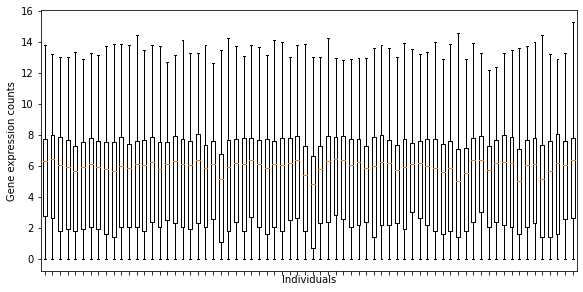

In [12]:
fig, ax = plt.subplots(figsize=(4.8 * 2, 2.4 * 2))
ax.boxplot(np.log(counts_subset + 1))
ax.set_xlabel("Individuals")
ax.set_ylabel("Gene expression counts")
reduce_xaxis_labels(ax, 5)

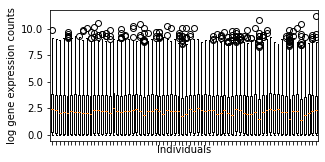

In [13]:
# Normalize by library size
# Divide the expression counts by the total counts for that individual
# Multiply by 1 million to get things back in a similar scale
counts_lib_norm = counts / total_counts * 1000000
# Notice how we just used broadcasting twice there!
counts_subset_lib_norm = counts_lib_norm[:,samples_index]
# Bar plot of expression counts by individual
fig, ax = plt.subplots(figsize=(4.8, 2.4))

ax.boxplot(np.log(counts_subset_lib_norm + 1))
ax.set_xlabel("Individuals")
ax.set_ylabel("log gene expression counts")
reduce_xaxis_labels(ax, 5)

#### Quantile normalize
Se os dados não se encaixam numa distribuição, vamos fazer-lo, em três etapas:
- Ordenar os valores ao longo das colunas
- Encontrar a média de cada linha resultante
- Substituir cada quantile da coluna com a quantilide da coluna média

In [14]:
def quantile_norm(X):
    """Normalize the columns of X to each have the same distribution.
    Given an expression matrix (microarray data, read counts, etc) of M genes
    by N samples, quantile normalization ensures all samples have the same
    spread of data (by construction).
    The data across each row are averaged to obtain an average column. Each
    column quantile is replaced with the corresponding quantile of the average
    column.
    Parameters
    ----------
    X : 2D array of float, shape (M, N)
    The input data, with M rows (genes/features) and N columns (samples).
    Returns
    -------
    Xn : 2D array of float, shape (M, N)
    The normalized data.
    """
    # compute the quantiles
    quantiles = np.mean(np.sort(X, axis=0), axis=1)
    # compute the column-wise ranks. Each observation is replaced with its
    # rank in that column: the smallest observation is replaced by 1, the
    # second-smallest by 2, ..., and the largest by M, the number of rows.
    ranks = np.apply_along_axis(stats.rankdata, 0, X)
    # convert ranks to integer indices from 0 to M-1
    rank_indices = ranks.astype(int) - 1
    # index the quantiles for each rank with the ranks matrix
    Xn = quantiles[rank_indices]
    return(Xn)

In [15]:
def quantile_norm_log(X):
    logX = np.log(X + 1)
    logXn = quantile_norm(logX)
    return logXn

In [16]:
from scipy import stats
def plot_col_density(data):
    """For each column, produce a density plot over all rows."""
    # Use Gaussian smoothing to estimate the density
    density_per_col = [stats.gaussian_kde(col) for col in data.T]
    x = np.linspace(np.min(data), np.max(data), 100)
    fig, ax = plt.subplots()
    for density in density_per_col:
        ax.plot(x, density(x))
        ax.set_xlabel('Data values (per column)')
        ax.set_ylabel('Density')

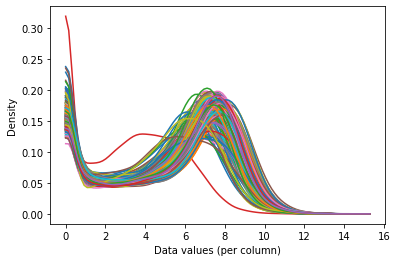

In [17]:
# Before normalization
log_counts = np.log(counts + 1)
plot_col_density(log_counts)

In [18]:
log_counts = np.log(counts + 1)

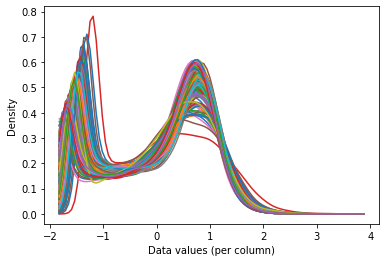

In [19]:
y = (log_counts - log_counts.mean(axis=0)) / log_counts.std(axis=0, ddof=1)
plot_col_density(y)

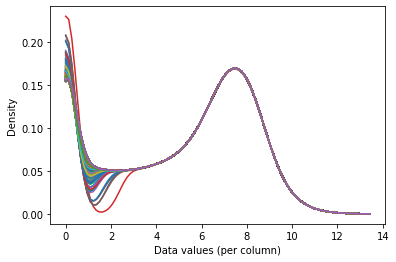

In [20]:
log_counts_normalized = quantile_norm_log(counts)
plot_col_density(log_counts_normalized)

# Capítulo 3

In [15]:
import numpy as np
from skimage import io
from scipy import ndimage as ndi

def add_edge_filter(values, graph):
    center = values[len(values) // 2]
    for neighbor in values:
        if neighbor != center and not graph.has_edge(center, neighbor):
            graph.add_edge(center, neighbor)
        return 0.0
def build_rag(labels, image):
    g = nx.Graph()
    footprint = ndi.generate_binary_structure(labels.ndim, connectivity=1)
    _ = ndi.generic_filter(labels, add_edge_filter, footprint=footprint,
    mode='nearest', extra_arguments=(g,))
    return g

Type: <class 'numpy.ndarray'> Shape: (512, 512, 3) Data type: uint8


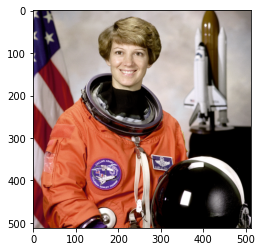

In [27]:
url_astronaut = ('https://raw.githubusercontent.com/scikit-image/scikit-image/'
'master/skimage/data/astronaut.png')
astro = io.imread(url_astronaut)
print("Type:", type(astro), "Shape:", astro.shape, "Data type:", astro.dtype)
plt.imshow(astro);

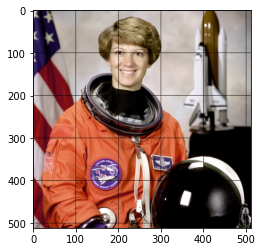

In [28]:
def overlay_grid(image, spacing=128):
    """Return an image with a grid overlay, using the provided spacing.
    Parameters
    ----------
    image : array, shape (M, N, 3)
    The input image.
    spacing : int
    The spacing between the grid lines.
    Returns
    -------
    image_gridded : array, shape (M, N, 3)
    The original image with a blue grid superimposed.
    """
    image_gridded = image.copy()
    image_gridded[np.arange(0,600,100),...] = 0
    image_gridded[:,np.arange(0,600,100),...] = 0
    return image_gridded
plt.imshow(overlay_grid(astro, 128)); # uncomment this line to test your function